The dataset used in this notebook is included in the folder of the project.

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
customers_data = pd.read_csv("C:\\users\\karth\\aiandml\datasets\\Mall_Customers.csv")

In [34]:
customers_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [10]:
customers_data['Genre'] = encoded_sex

In [38]:
customers_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [84]:
customers_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(customers_data)

In [15]:
reduced_data.shape

(200, 2)

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=5)

In [18]:
cluster = km.fit(reduced_data)

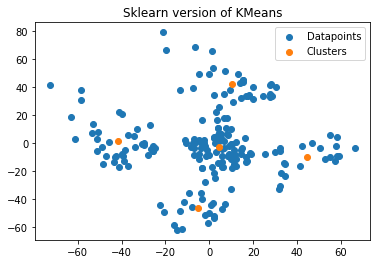

In [21]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [22]:
from kmeans_numpy_improved import *

In [75]:
km_numpy = KMeans_numpy(n_clusters=5, tolerance=0.0001)

In [80]:
clusters, clusterd_data = km_numpy.fit(reduced_data)
clusters = np.array(clusters)

In [81]:
cluster_one_data = np.array(clusterd_data[0])
cluster_two_data = np.array(clusterd_data[1])
cluster_three_data = np.array(clusterd_data[2])
cluster_four_data = np.array(clusterd_data[3])
cluster_five_data = np.array(clusterd_data[4])

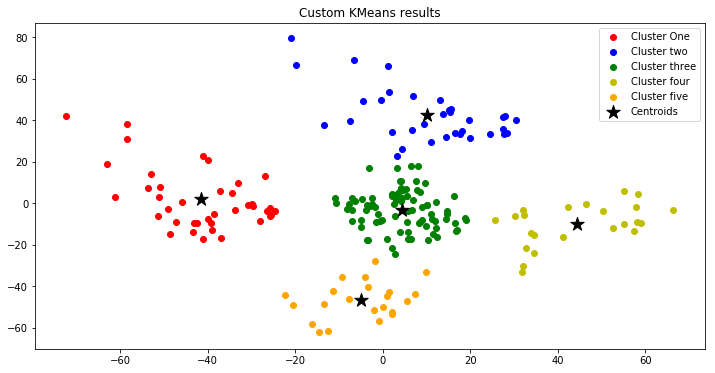

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

### Mean Shift

In [36]:
from sklearn.cluster import MeanShift

In [58]:
mshift = MeanShift(bandwidth=25)

In [59]:
cluster_mean = mshift.fit(reduced_data)

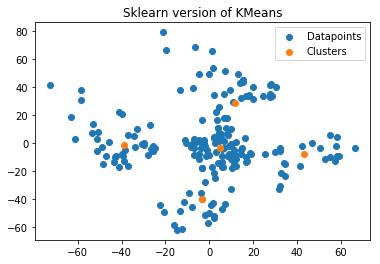

In [60]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster_mean.cluster_centers_[:, 0], cluster_mean.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

## Analyse clusters

In [69]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(customers_data.values)

Let's creat table for each centroid so we can easly visualise data in clusters

In [87]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [89]:
cluster_1

Cluster One data


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,23,16,77
3,0,31,17,40
4,0,22,17,76
5,0,23,18,94
6,0,30,19,72
7,0,35,19,99
8,0,24,20,77
9,1,22,20,79


In [97]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 25.814814814814813
Average annual income (in thousends) for customers in cluster one: 26.62962962962963
Deviation of the mean for annual income (in thousends) for customers in cluster one: 8.641622567756968
In cluster one we have: 27 customers
From those customers we have 11 male and 16 female


### Cluster TWO Customers analysis

In [93]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,42,86,20
1,0,36,87,27
2,1,40,87,13
3,1,36,87,10
4,0,52,88,13
5,1,59,93,14
6,0,37,97,32
7,1,46,98,15
8,0,41,99,39
9,0,54,101,24


In [100]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 40.94444444444444
Average annual income (in thousands) for customers in cluster one: 104.88888888888889
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.927587243211693
In cluster one we have: 18 customers
From those customers we have 9 male and 9 female


### Cluster THREE Customers analysis

In [99]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,20,16,6
1,0,35,18,6
2,1,64,19,3
3,1,67,19,14
4,0,58,20,15
5,1,37,20,13
6,0,35,21,35
7,1,52,23,29
8,1,35,24,35
9,0,46,25,5


In [103]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 48.53333333333333
Average annual income (in thousands) for customers in cluster one: 52.68888888888889
Deviation of the mean for annual income (in thousands) for customers in cluster one: 18.271194356414593
In cluster one we have: 90 customers
From those customers we have 40 male and 50 female


### Cluster FOUR Customers analysis

In [104]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,39,69,91
1,1,40,71,95
2,0,29,73,88
3,1,32,75,93
4,0,32,76,87
5,1,28,77,97
6,0,32,77,74
7,1,34,78,90
8,1,39,78,88
9,0,38,78,76


In [105]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 32.58620689655172
Average annual income (in thousands) for customers in cluster one: 86.75862068965517
Deviation of the mean for annual income (in thousands) for customers in cluster one: 12.62907202317211
In cluster one we have: 29 customers
From those customers we have 12 male and 17 female


### Cluster FIVE Customers analysis

In [107]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,31,43,54
1,0,27,46,51
2,1,19,46,55
3,1,18,48,59
4,1,19,48,59
5,1,26,54,54
6,0,23,54,52
7,1,38,54,55
8,0,21,54,57
9,0,22,57,55


In [108]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 28.416666666666668
Average annual income (in thousands) for customers in cluster one: 62.416666666666664
Deviation of the mean for annual income (in thousands) for customers in cluster one: 9.67923034130297
In cluster one we have: 36 customers
From those customers we have 16 male and 20 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a posibility  to conduct an survay on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.